In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
exams=pd.read_csv('StudentsPerformance.csv')

In [3]:
exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
exams.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


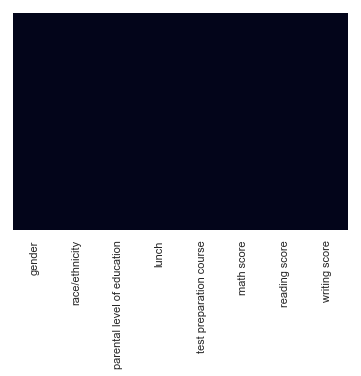

In [6]:
sns.heatmap(exams.isnull(),yticklabels=False,cbar=False)

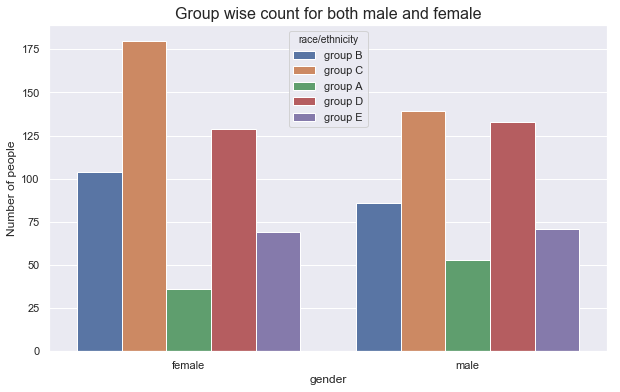

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender',hue='race/ethnicity',data=exams)
plt.title('Group wise count for both male and female',fontsize=16)
plt.ylabel('Number of people',fontsize=12)
plt.show()

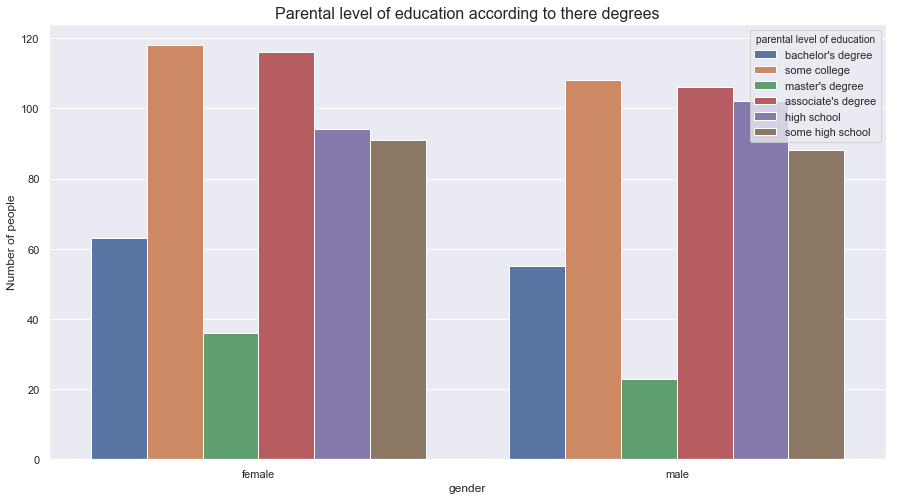

In [8]:
plt.figure(figsize=(15,8))
ple=exams['parental level of education'].sort_values(ascending=True)
sns.countplot(x='gender',hue='parental level of education',data=exams)
plt.title('Parental level of education according to there degrees',fontsize=16)
plt.ylabel('Number of people',fontsize=12)
plt.show()

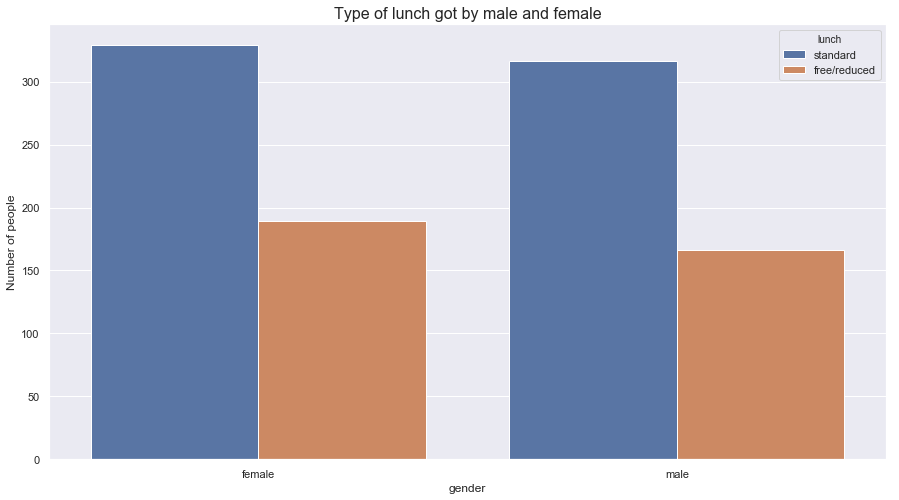

In [9]:
plt.figure(figsize=(15,8))
ple=exams['lunch'].sort_values(ascending=True)
sns.countplot(x='gender',hue='lunch',data=exams)
plt.title('Type of lunch got by male and female',fontsize=16)
plt.ylabel('Number of people',fontsize=12)
plt.show()

In [10]:
highest_mathscore=exams.iloc[[exams['math score'].idxmax()]]
highest_mathscore

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93


In [11]:
lowest_mathscore=exams.iloc[[exams['math score'].idxmin()]]
lowest_mathscore

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


In [12]:
highest_readingscore=exams.iloc[[exams['reading score'].idxmax()]]
highest_readingscore

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
106,female,group D,master's degree,standard,none,87,100,100


In [13]:
lowest_readingscore=exams.iloc[[exams['reading score'].idxmin()]]
lowest_readingscore

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


In [14]:
highest_writingscore=exams.iloc[[exams['writing score'].idxmax()]]
highest_writingscore

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
106,female,group D,master's degree,standard,none,87,100,100


In [15]:
lowest_writingscore=exams.iloc[[exams['writing score'].idxmin()]]
lowest_writingscore

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


In [16]:
passmark=40

In [17]:
exams['math_score']=np.where(exams['math score']<passmark,'F','P')
exams['math_score'].value_counts()

P    960
F     40
Name: math_score, dtype: int64

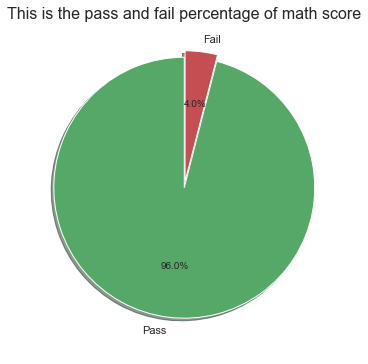

In [18]:
slices=['960','40']
values=['P','F']
labels=['Pass','Fail']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['g','r'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.title('This is the pass and fail percentage of math score',fontsize=16)
plt.show()

In [19]:
exams['reading_score']=np.where(exams['reading score']<passmark,'F','P')
exams['reading_score'].value_counts()

P    974
F     26
Name: reading_score, dtype: int64

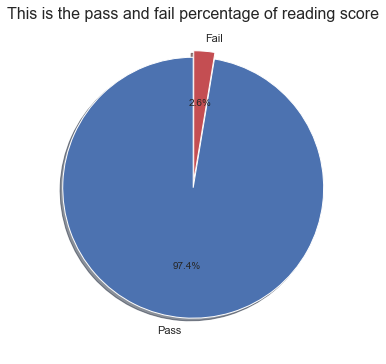

In [20]:
slices=['974','26']
values=['P','F']
labels=['Pass','Fail']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['b','r'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.title('This is the pass and fail percentage of reading score',fontsize=16)
plt.show()

In [21]:
exams['writing_score']=np.where(exams['writing score']<passmark,'F','P')
exams['writing_score'].value_counts()

P    968
F     32
Name: writing_score, dtype: int64

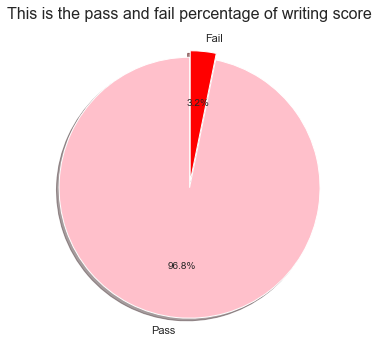

In [22]:
slices=['968','32']
values=['P','F']
labels=['Pass','Fail']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['pink','red'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.title('This is the pass and fail percentage of writing score',fontsize=16)
plt.show()

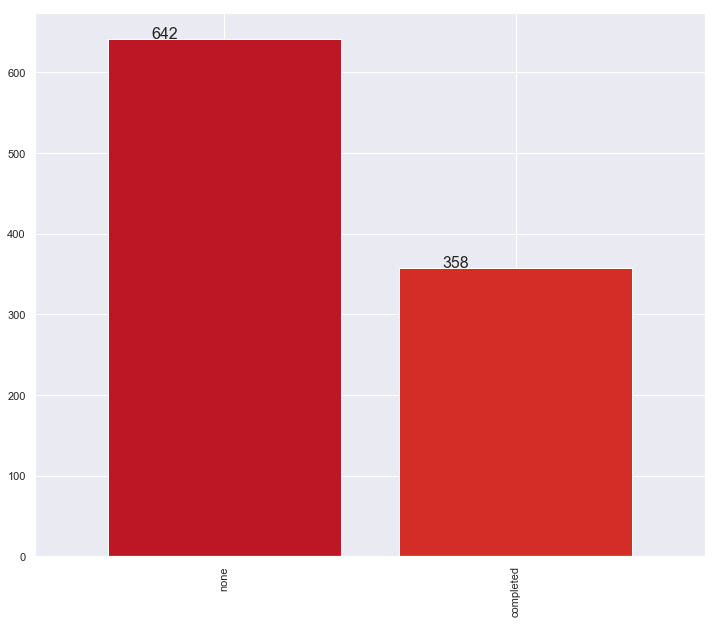

In [52]:
plt.subplots(figsize=(12,10))
test=exams['test preparation course'].value_counts().head().plot.bar(width=.8,color=sns.color_palette('RdYlGn',20))
for p in test.patches:
    test.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25),fontsize=16)

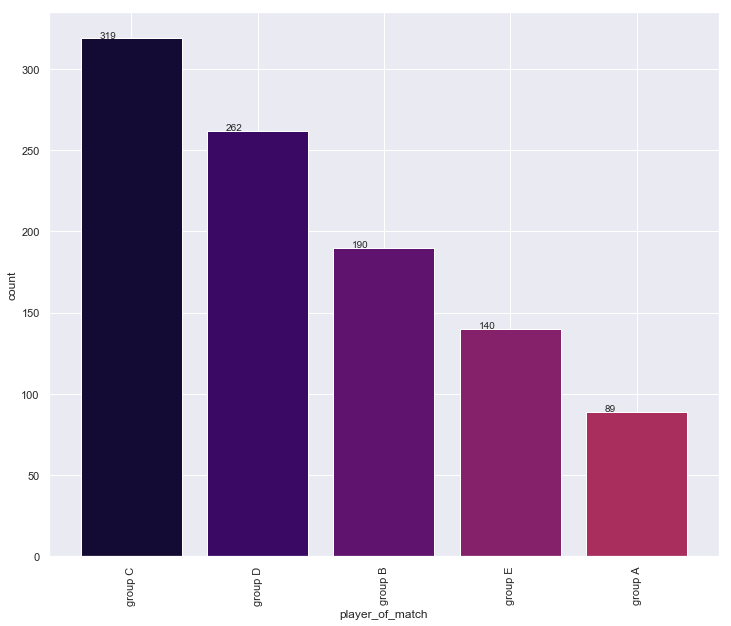

In [23]:
plt.subplots(figsize=(12,10))
ax=exams['race/ethnicity'].value_counts().head(10).plot.bar(width=.8,color=sns.color_palette('inferno',10))
ax.set_xlabel('player_of_match')
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

In [58]:
exams['overall_pass_status']=exams.apply(lambda x:'F' if x ['math_score']=='F' or 
                                         x['reading_score']=='F'or x['writing_score']=='F' else 'P',axis=1)
exams['overall_pass_status'].value_counts()


P    949
F     51
Name: overall_pass_status, dtype: int64

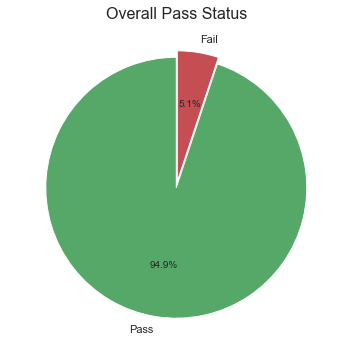

In [65]:
slices=['949','51']
values=['P','F']
labels=['Pass','Fail']
plt.pie(slices,labels=labels,startangle=90,explode=(0,0.05),autopct='%1.1f%%',colors=['g','r'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.title('Overall Pass Status',fontsize=16)
plt.show()

In [34]:
exams['Total_marks']=exams['math score']+exams['reading score']+exams['writing score']
exams['percentage']=exams['Total_marks']/3

In [40]:
def GetGrade(percentage, overall_pass_status):
    if ( overall_pass_status == 'F'):
        return 'F'    
    if ( percentage >= 80 ):
        return 'A'
    if ( percentage >= 70):
        return 'B'
    if ( percentage >= 60):
        return 'C'
    if ( percentage >= 50):
        return 'D'
    if ( percentage >= 40):
        return 'E'
    else: 
        return 'F'

exams['Grade'] = exams.apply(lambda x : GetGrade(x['percentage'], x['overall_pass_status']), axis=1)

exams.Grade.value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

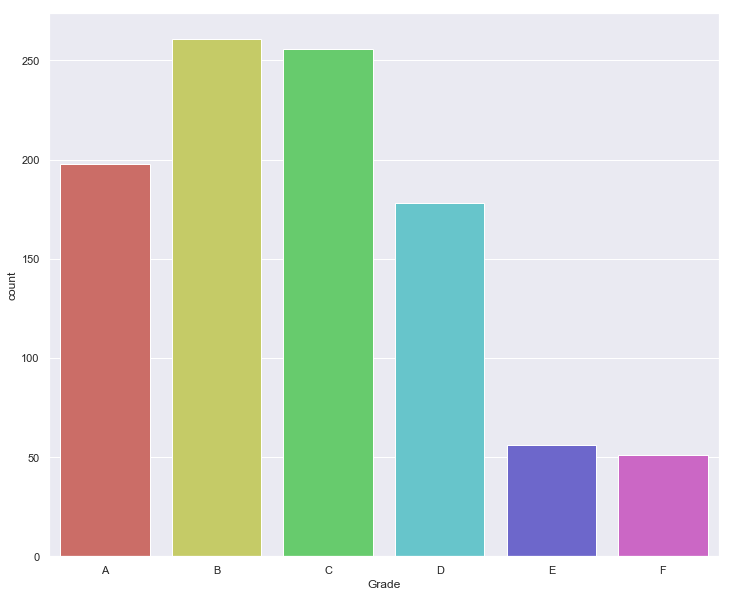

In [45]:
plt.figure(figsize=(12,10))
sns.countplot(x='Grade',data=exams,order=['A','B','C','D','E','F'],palette='hls')
plt.show()

In [ ]:
plt.figure(figsize=(12,10))
p=sns.countplot(x='parental level of education',data=exams,hue='Grade',palette='bright')
figgy=plt.setp(p.get_xticklabels(),rotation=90)